In [1]:
import boto3
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'CarPrice_Assignment.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading the datafile
car_price = pd.read_csv(file_content_stream)
car_price.head()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
# defining the input and target variables
x = car_price[['wheelbase','enginesize','compressionratio','horsepower','peakrpm','citympg']]
y = car_price['price']

# splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [3]:
# min-max transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

first model

In [14]:
# defining the model
md1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

md1.compile(optimizer = 'adam', loss = 'mse')
history = md1.fit(x_train, y_train, epochs = 100, batch_size = 100, validation_data = (x_test, y_test))

Epoch 1/100
2/2 [==============================] - 0s 47ms/step - loss: 255403280.0000 - val_loss: 177308736.0000
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 255402928.0000 - val_loss: 177308416.0000
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 255402528.0000 - val_loss: 177308080.0000
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 255402176.0000 - val_loss: 177307728.0000
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 255401760.0000 - val_loss: 177307392.0000
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 255401360.0000 - val_loss: 177307056.0000
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 255400992.0000 - val_loss: 177306704.0000
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 255400560.0000 - val_loss: 177306368.0000
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 255400192.0000 -

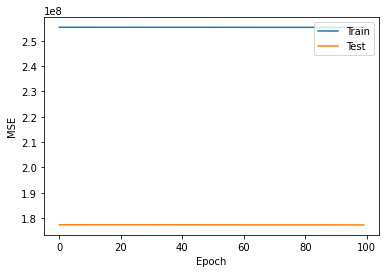

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.grid
plt.show()

In [16]:
md1.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 177248928.0000


177248928.0

second model

In [17]:
# defining the model
md2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

md2.compile(optimizer = 'adam', loss = 'mse')
history = md2.fit(x_train, y_train, epochs = 100, batch_size = 100, validation_data = (x_test, y_test))

Epoch 1/100
2/2 [==============================] - 0s 59ms/step - loss: 255398992.0000 - val_loss: 177305744.0000
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 255398784.0000 - val_loss: 177305536.0000
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 255398560.0000 - val_loss: 177305344.0000
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 255398336.0000 - val_loss: 177305168.0000
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 255398080.0000 - val_loss: 177304960.0000
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 255397888.0000 - val_loss: 177304768.0000
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 255397664.0000 - val_loss: 177304544.0000
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 255397440.0000 - val_loss: 177304384.0000
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 255397216.0000 -

KeyError: 'val_loss'

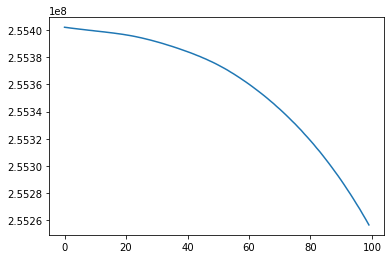

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train','Test'])
plt.grid()
plt.show();

In [12]:
md2.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 177170752.0000


177170752.0

In [13]:
#second model is better to predict rpice because the mse is smaller